In [ ]:
import os

os.environ["KAGGLE_USERNAME"]="ishita5062"
os.environ["KAGGLE_KEY"]="4a24a3230a35f957a1d688e1b9dd5878"

!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs

 98% 111M/113M [00:08<00:00, 18.5MB/s]
100% 113M/113M [00:08<00:00, 14.7MB/s]


In [ ]:
from IPython.display import clear_output
!unzip /content/cuhk-face-sketch-database-cufs.zip
clear_output()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tqdm import tqdm
import re
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
imgPath="/content/photos"
imgDir = os.listdir(imgPath)
sketchPath = "/content/sketches"
sketchDir = os.listdir(sketchPath)

In [ ]:
len(imgDir)

188

In [ ]:
len(sketchDir)

188

In [ ]:
def sorted_alphanumeric(data):
    # convert to lowercase
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    # splitting to obtain key
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [ ]:
imgDir = sorted_alphanumeric(imgDir)
sketchDir = sorted_alphanumeric(sketchDir)

In [ ]:
img_h = 256
img_w = 256
photo_channel = 3
sketch_channel = 1

In [ ]:
def load_images():
  imgArray = []
  for one in tqdm(imgDir):
    image = cv2.imread(imgPath+"/"+one);
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(img_h,img_w))
    image = image.astype('float32') / 255.0
    imgArray+=[image];
    # img1 = cv2.flip(image,1)
    # img1 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # imgArray+=[img1]
    # img2 = cv2.flip(image,-1)
    # img2 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # imgArray+=[img2]
    # img3 = cv2.flip(image,1)
    # img3 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # imgArray+=[img3]
    # img4 = cv2.flip(image,-1)
    # img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # imgArray+=[img4]
  imgArray = np.array(imgArray)
  return imgArray

def load_sketches():
  imgArray = []
  for one in tqdm(sketchDir):
    image = cv2.imread(sketchPath+"/"+one);
    image = cv2.resize(image,(img_h,img_w))
    image = image.astype('float32') / 255.0
    imgArray+=[image];
    # img1 = cv2.flip(image,1)
    # img1 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # imgArray+=[img1]
    # img2 = cv2.flip(image,-1)
    # img2 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # imgArray+=[img2]
    # img3 = cv2.flip(image,1)
    # img3 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    # imgArray+=[img3]
    # img4 = cv2.flip(image,-1)
    # img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    # imgArray+=[img4]
  imgArray = np.array(imgArray)
  return imgArray


In [ ]:
photos = load_images()
sketches = load_sketches()

100%|██████████| 188/188 [00:00<00:00, 1037.01it/s]


In [ ]:
sketches.shape

(188, 256, 256, 3)

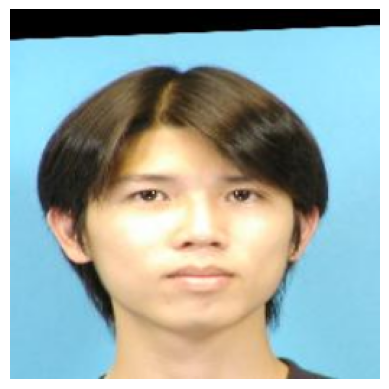

In [ ]:
plt.axis("off")
plt.imshow(photos[60])

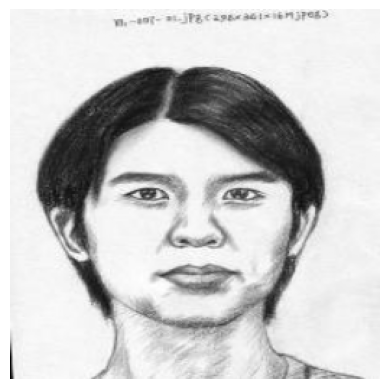

In [ ]:
plt.axis("off")
plt.imshow(sketches[60])

In [ ]:
photos.shape

(188, 256, 256, 3)

In [ ]:
sketches.shape

(188, 256, 256, 3)

In [ ]:
def plot_images(image, sketches):
  n=10
  plt.figure(figsize=(20,4))
  index= 0
  for i in range(n):
      ax = plt.subplot(2, n, i+1)
      # ploting original image
      plt.imshow(image[index+i+4*i])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2, n, n+i+1)
      # ploting decoded/reconstructued image
      plt.imshow(sketches[index+i+4*i])
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()

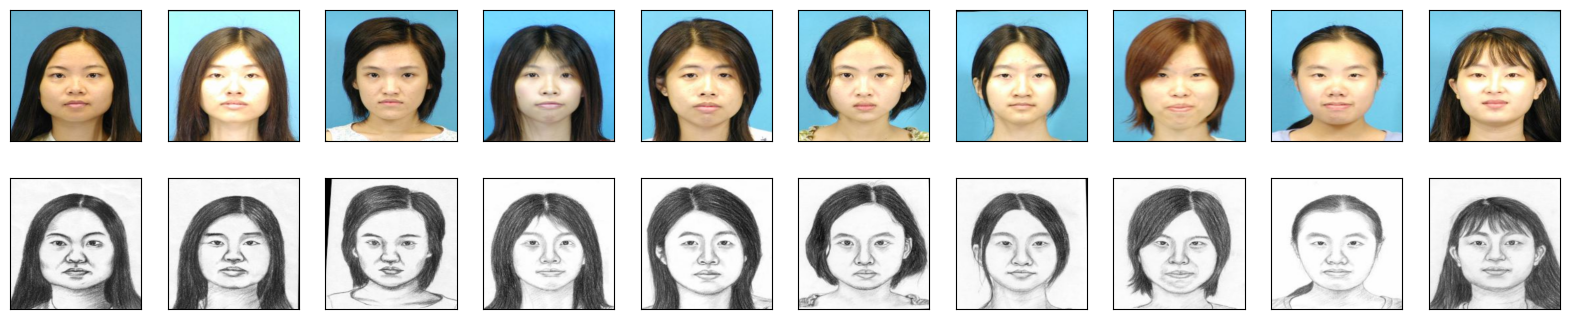

In [ ]:
plot_images(photos,sketches)

In [ ]:
#dividing into test and train

In [ ]:
train_photo = photos[:10]
test_photo = photos[180:]

train_sketch = sketches[:10]
test_sketch = sketches[180:]

In [ ]:
train_photo = np.reshape(train_photo,(len(train_photo),img_h,img_w,3))
train_sketch = np.reshape(train_sketch, (len(train_sketch),img_h,img_w,3))
print('Train color image shape:',train_photo.shape)
test_sketch = np.reshape(test_sketch,(len(test_sketch),img_h,img_w,3))
test_photo = np.reshape(test_photo, (len(test_photo),img_h,img_w,3))
print('Test color image shape',test_photo.shape)

Train color image shape: (10, 256, 256, 3)
Test color image shape (8, 256, 256, 3)


In [ ]:
train_photo.shape

(10, 256, 256, 3)

In [ ]:
train_sketch.shape

(10, 256, 256, 3)

In [ ]:
test_photo.shape

(8, 256, 256, 3)

In [ ]:
pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-b65in17_
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-b65in17_
  Resolved https://github.com/tensorflow/examples.git to commit 0bbf4fe43fbf41b7174b9ce4a64d69bd33aadd21
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1689703202.67065300351684276117070052891639684042406419745-py3-none-any.whl size=301555 sha256=15733f868c0e6ddcd5dcb04ee0bd035664347ecf89b86097b9fa95ac716a3b8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-87scvl7f/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

import time

AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
BUFFER_SIZE = 40
BATCH_SIZE = 32

In [ ]:
train_photo = tf.data.Dataset.from_tensor_slices(train_photo).batch(BATCH_SIZE)
test_photo = tf.data.Dataset.from_tensor_slices(test_photo).batch(BATCH_SIZE)
train_sketch = tf.data.Dataset.from_tensor_slices(train_sketch).batch(BATCH_SIZE)
test_sketch = tf.data.Dataset.from_tensor_slices(test_sketch).batch(BATCH_SIZE)

# test_photo1 = test_photo.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# train_sketch1 = train_sketch.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# test_sketch1 = test_sketch.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
# train_photo1 = train_photo.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
sample_photo = next(iter(train_photo))
sample_sketch = next(iter(train_sketch))

In [ ]:
OUTPUT_CHANNELS = 3

generator_g = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')
generator_f = pix2pix.unet_generator(OUTPUT_CHANNELS, norm_type='instancenorm')

discriminator_x = pix2pix.discriminator(norm_type='instancenorm', target=False)
discriminator_y = pix2pix.discriminator(norm_type='instancenorm', target=False)

In [ ]:
generator_g.summary()

In [ ]:
gen_sketch = generator_g(sample_photo)
gen_photo = generator_f(sample_sketch)
plt.figure(figsize=(8, 8))
contrast = 8

imgs = [sample_photo, gen_sketch, sample_sketch, gen_sketch]
title = ['Photo', 'Generated Sketch', 'Sketch', 'Generated Photo']

for i in range(len(imgs)):
  plt.subplot(2, 2, i+1)
  plt.title(title[i])
  if i % 2 == 0:
    plt.imshow(imgs[i][0] * 0.5 + 0.5)
    plt.axis("off")
  else:
    plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
    plt.axis("off")
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))

plt.subplot(121)
plt.title('Is it a sketch?')
plt.imshow(discriminator_y(sample_sketch)[0, ..., -1], cmap='RdBu_r')

plt.subplot(122)
plt.title('Is it a photo?')
plt.imshow(discriminator_x(sample_photo)[0, ..., -1], cmap='RdBu_r')

plt.show()

In [ ]:
#Loss

LAMBDA = 10

In [ ]:
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real, generated):
  real_loss = loss_obj(tf.ones_like(real), real)

  generated_loss = loss_obj(tf.zeros_like(generated), generated)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss * 0.5

In [ ]:
def generator_loss(generated):
  return loss_obj(tf.ones_like(generated), generated)

In [ ]:
def calc_cycle_loss(real_image, cycled_image):
  loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

  return LAMBDA * loss1

In [ ]:
def identity_loss(real_image, same_image):
  loss = tf.reduce_mean(tf.abs(real_image - same_image))
  return LAMBDA * 0.5 * loss

In [ ]:
generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [ ]:
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(generator_g=generator_g,
                           generator_f=generator_f,
                           discriminator_x=discriminator_x,
                           discriminator_y=discriminator_y,
                           generator_g_optimizer=generator_g_optimizer,
                           generator_f_optimizer=generator_f_optimizer,
                           discriminator_x_optimizer=discriminator_x_optimizer,
                           discriminator_y_optimizer=discriminator_y_optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print ('Latest checkpoint restored!!')

In [ ]:
#Training

In [ ]:
EPOCHS = 25

In [ ]:
def generate_images(model, test_input):
  prediction = model(test_input)

  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [ ]:
@tf.function
def train_step(real_x, real_y):
  # persistent is set to True because the tape is used more than
  # once to calculate the gradients.
  with tf.GradientTape(persistent=True) as tape:
    # Generator G translates X -> Y
    # Generator F translates Y -> X.

    fake_y = generator_g(real_x, training=True)
    cycled_x = generator_f(fake_y, training=True)



    fake_x = generator_f(real_y, training=True)
    cycled_y = generator_g(fake_x, training=True)


    # same_x and same_y are used for identity loss.
    same_x = generator_f(real_x, training=True)
    same_y = generator_g(real_y, training=True)


    disc_real_x = discriminator_x(real_x, training=True)
    disc_real_y = discriminator_y(real_y, training=True)

    disc_fake_x = discriminator_x(fake_x, training=True)
    disc_fake_y = discriminator_y(fake_y, training=True)


    # calculate the loss
    gen_g_loss = generator_loss(disc_fake_y)
    gen_f_loss = generator_loss(disc_fake_x)


    total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)


    # Total generator loss = adversarial loss + cycle loss
    total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
    total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)

    disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
    disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)


  # Calculate the gradients for generator and discriminator
  generator_g_gradients = tape.gradient(total_gen_g_loss,
                                        generator_g.trainable_variables)
  generator_f_gradients = tape.gradient(total_gen_f_loss,
                                        generator_f.trainable_variables)

  discriminator_x_gradients = tape.gradient(disc_x_loss,
                                            discriminator_x.trainable_variables)
  discriminator_y_gradients = tape.gradient(disc_y_loss,
                                            discriminator_y.trainable_variables)

  # Apply the gradients to the optimizer
  generator_g_optimizer.apply_gradients(zip(generator_g_gradients,
                                            generator_g.trainable_variables))

  generator_f_optimizer.apply_gradients(zip(generator_f_gradients,
                                            generator_f.trainable_variables))

  discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients,
                                                discriminator_x.trainable_variables))

  discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients,
                                                discriminator_y.trainable_variables))
  print("**")

In [ ]:
for epoch in tqdm(range(EPOCHS)):
  start = time.time()

  n = 0
  for image_x, image_y in zip(train_photo, train_sketch):
    train_step(image_x, image_y)
    print("1/2 done")
    if n % 1 == 0:
      print ('.', end='')
    n += 1
    print("1 done")
  clear_output(wait=True)
  # Using a consistent image (sample_horse) so that the progress of the model
  # is clearly visible.
  generate_images(generator_f, sample_sketch)

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

  print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

In [ ]:
type(train_photo)

In [ ]:
if train_photo is None or train_sketch is None:
    print("Error: train_photo or train_sketch is None.")
    exit()

for epoch in range(EPOCHS):
    start = time.time()

    n = 0
    for image_x, image_y in tf.data.Dataset.zip((train_photo, train_sketch)):
        train_step(image_x, image_y)
        if n % 1 == 0:
            print ('.', end='')
        n += 1

    clear_output(wait=True)
    # Using a consistent image (sample_horse) so that